<a href="https://colab.research.google.com/github/rashmibenni292-benni/Breast-Cancer-Classification-using-Logistic-Regression-Wisconsin-Dataset-/blob/main/notebooks/logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📌 **Overview**

The Breast Cancer dataset is a **binary classification dataset** used to predict whether a breast tumor is **malignant** or **benign** based on features computed from digitized images of fine needle aspirate (FNA) of breast masses.

It is one of the most widely used datasets for demonstrating **Logistic Regression**, **classification fundamentals**, and **medical ML use cases**.

---

### 🎯 **Problem Statement**

Given a set of numerical features describing cell nuclei characteristics, predict whether the tumor is:

* **Malignant (1)** – Cancerous
* **Benign (0)** – Non-cancerous

---

### 🏥 **Real-World Impact**

Accurate classification helps in:

* Early cancer detection
* Reducing unnecessary biopsies
* Supporting medical decision-making


In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint
import pickle

## 🧬 **Dataset: Breast Cancer (Wisconsin Diagnostic Dataset)**


### 📊 **Dataset Characteristics**

* **Total samples:** 569
* **Total features:** 30 numerical features
* **Target variable:** `diagnosis`

  * `M` → Malignant
  * `B` → Benign

---

### 🧪 **Feature Description**

The features are computed from a digitized image of a breast mass and describe characteristics of the cell nuclei such as:

* Radius (mean distance from center to points on the perimeter)
* Texture (standard deviation of gray-scale values)
* Perimeter
* Area
* Smoothness
* Compactness
* Concavity
* Symmetry
* Fractal dimension

Each feature is represented as:

* **Mean**
* **Standard Error**
* **Worst (largest) value**

➡️ This results in **30 total numerical input features**.

---

### 🧠 **Why this dataset is perfect for Logistic Regression**

* Binary classification problem ✔️
* Clean, numerical features ✔️
* Linearly separable tendencies ✔️
* Real-world medical relevance ✔️
* Great for explaining:

  * Sigmoid function
  * Decision boundary
  * Gradient descent
  * Loss optimization

---





In [3]:
df = pd.read_csv('/content/breast-cancer.csv')

# Data Analysis

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#0B1C2D', '#3CF2C2'])

In [6]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['#0B1C2D', '#3CF2C2'])

In [7]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#0B1C2D', '#3CF2C2'])

In [8]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#0B1C2D', '#3CF2C2'])

In [9]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#0B1C2D', '#3CF2C2'])

In [10]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#0B1C2D', '#3CF2C2'])

In [11]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#0B1C2D', '#3CF2C2'])


In [12]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#0B1C2D', '#3CF2C2'])


In [13]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#0B1C2D', '#3CF2C2'])


# Data Pre-processing

In [14]:
df.drop('id', axis=1, inplace=True) #drop redundant columns

In [15]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

# Identify highly correlated features with the target

In [16]:
corr = df.corr()

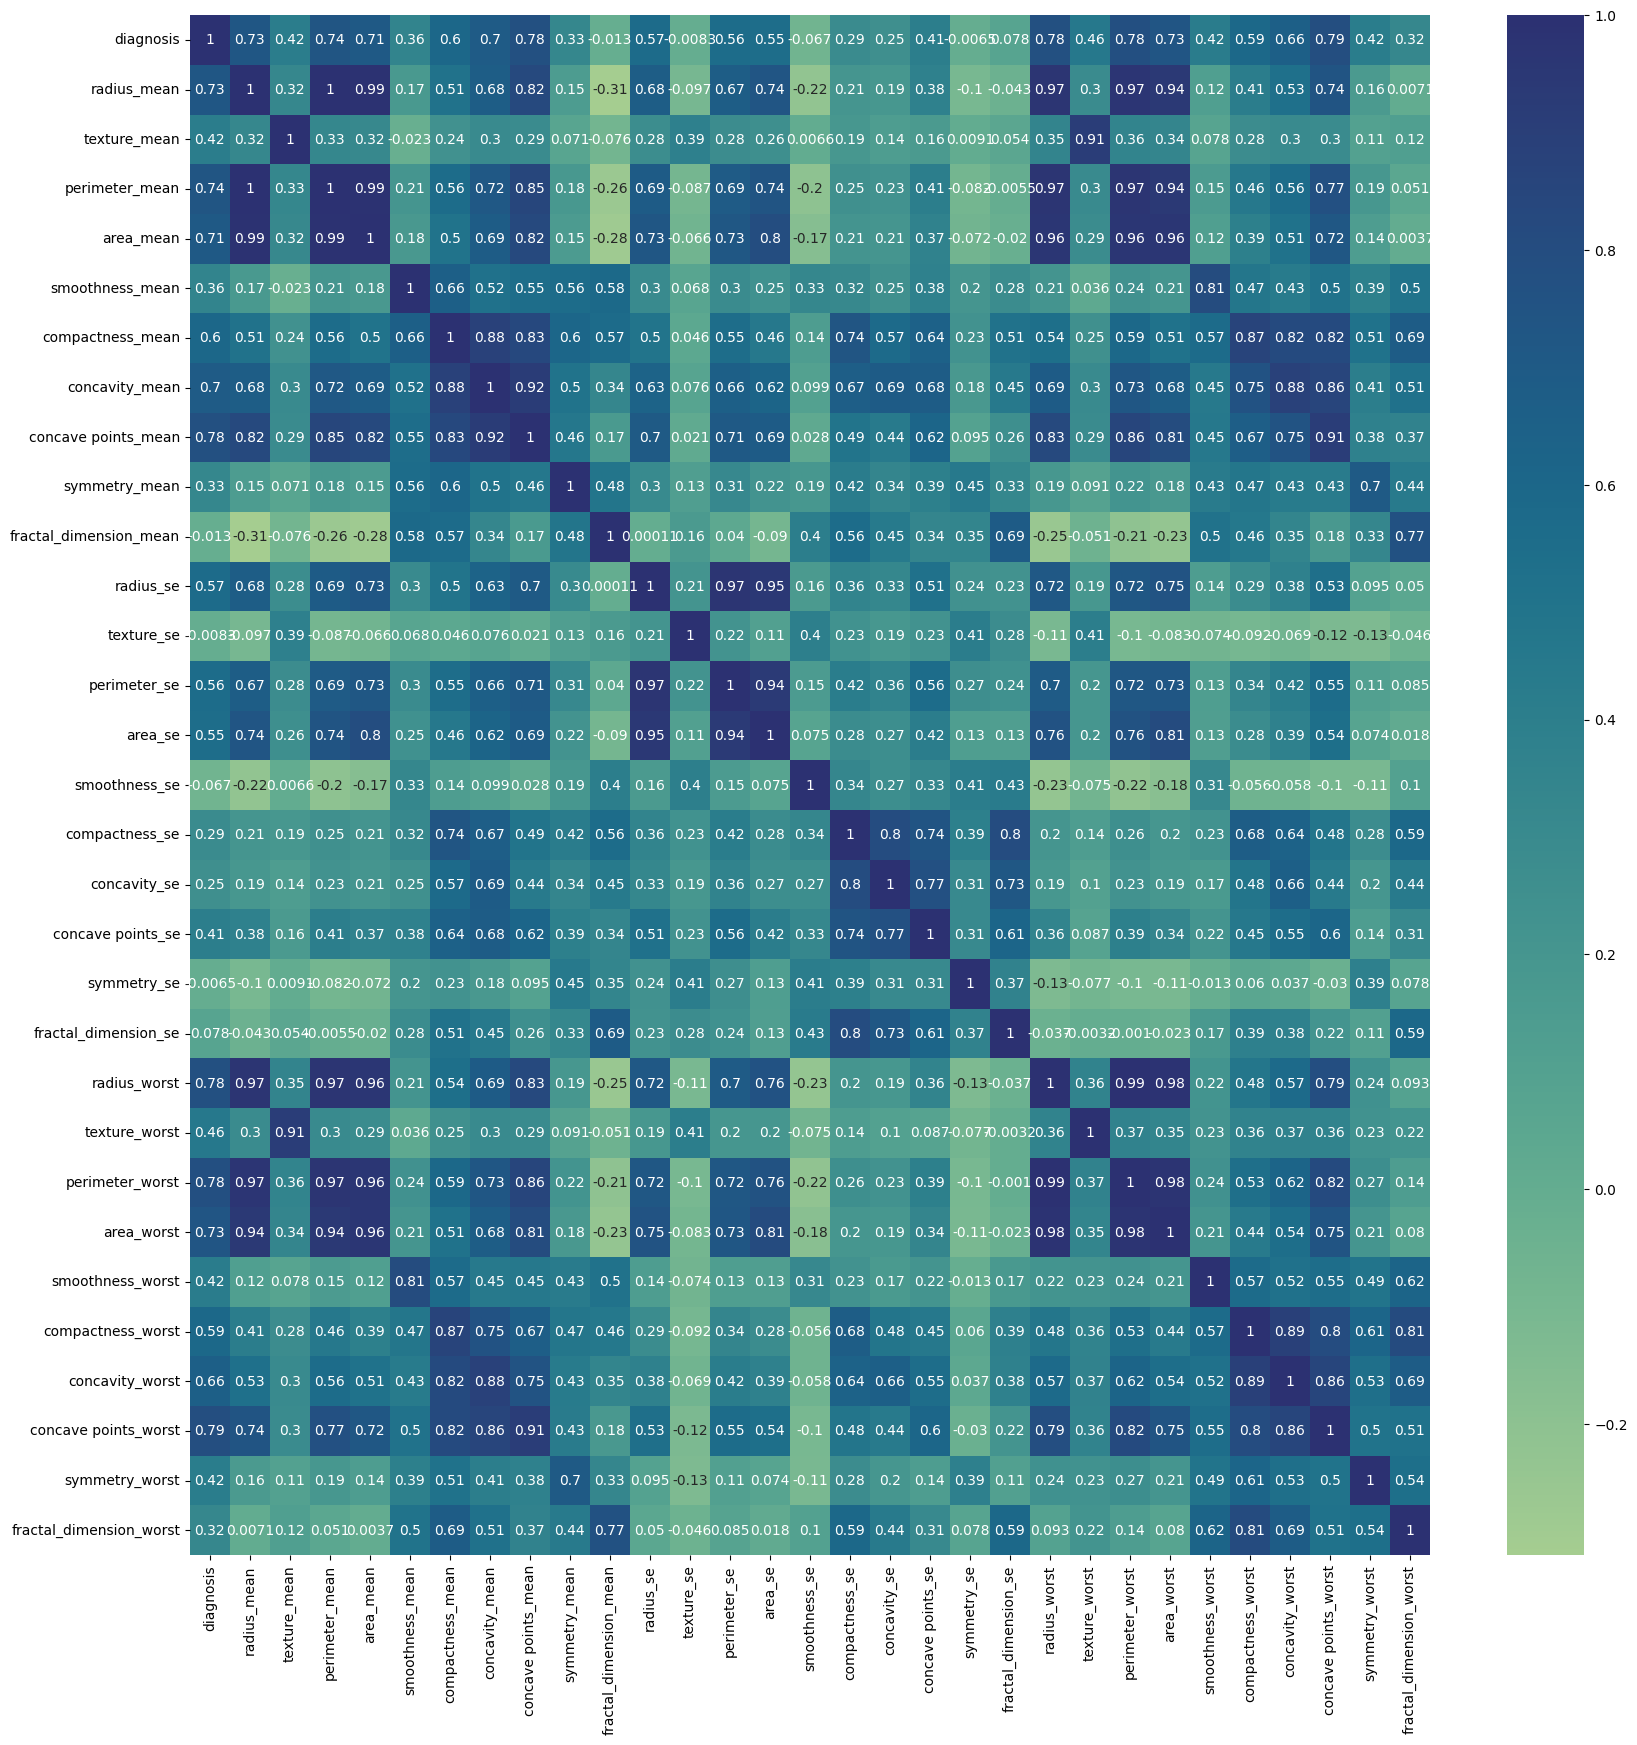

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='crest',annot=True)
plt.show()

In [18]:
# Compute the absolute correlation values with the target variable
cor_target = abs(corr["diagnosis"])

# Filter features having correlation greater than the threshold (0.2)
relevant_features = cor_target[cor_target > 0.2]

# Extract feature names that meet the correlation criteria
names = [index for index, value in relevant_features.items()]

# Remove the target variable from the selected features
names.remove('diagnosis')

# Print the final list of selected feature names
pprint.pprint(names)


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


In [19]:
X = df[names].values
y = df['diagnosis'].values

In [20]:
def train_test_split(X, y, random_state=42, test_size=0.2):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Determine the total number of samples in the dataset
    n_samples = X.shape[0]

    # Initialize the random seed for reproducibility
    np.random.seed(random_state)

    # Randomly permute sample indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Compute the number of samples allocated to the test set
    test_size = int(n_samples * test_size)

    # Separate indices into training and testing groups
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Create training and testing splits for features and target
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

### How to Standardize Data

Standardization follows these steps:

1. Compute the mean ($\mu$) and standard deviation ($\sigma$) for each feature.
2. Transform each value by subtracting the mean and dividing by the standard deviation.

The standardized value of a feature `x` is given by:

$$
\text{Standardized value} = \frac{x - \mu}{\sigma}
$$

where  
- `x` is the original feature value  
- $\mu$ is the feature mean  
- $\sigma$ is the feature standard deviation


In [22]:
def standardize_data(X_train, X_test):
    """
    Standardizes the input data using mean and standard deviation.

    Parameters:
        X_train (numpy.ndarray): Training data.
        X_test (numpy.ndarray): Testing data.

    Returns:
        Tuple of standardized training and testing data.
    """
    # Compute feature-wise mean and standard deviation from the training set
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    # Apply standardization to both training and testing data
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std

    return X_train, X_test

X_train, X_test = standardize_data(X_train, X_test)


# Model Implementation

# Logistic Regression Model

Logistic regression is a popular machine learning algorithm used for **binary classification**. It estimates the probability that an input belongs to a specific class using the logistic (sigmoid) function:

$$ f_{\mathbf{w},b}(\mathbf{x}) = g(\mathbf{w} \cdot \mathbf{x} + b) $$

where $f_{\mathbf{w},b}(\mathbf{x})$ is the predicted probability, $\mathbf{w}$ is the weight vector, $b$ is the bias, $\mathbf{x}$ is the input feature vector, and $g(z)$ is the sigmoid function:

$$ g(z) = \frac{1}{1 + e^{-z}} $$

## Model Training

Training aims to learn optimal parameters $(\mathbf{w}, b)$ that produce accurate probability estimates for the given data.

### Forward Pass

First, a linear combination of inputs and weights is computed and passed through the sigmoid function:

$$ Z = \mathbf{x} \cdot \mathbf{w} + b $$
$$ A = \sigma(Z) $$

### Cost Function

Model performance is measured using the **binary cross-entropy loss**:

$$ J(\mathbf{w},b) = -\frac{1}{m} \sum_{i=0}^{m-1} \left[y_i \log\left(f_{\mathbf{w},b}(\mathbf{x}_i)\right) + (1 - y_i) \log\left(1 - f_{\mathbf{w},b}(\mathbf{x}_i)\right)\right] $$

where $m$ is the total number of samples and $y_i$ is the true label.

### Backward Pass (Gradient Computation)

Gradients of the cost function are computed to guide parameter updates:

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \left(f_{\mathbf{w},b}(\mathbf{x}_i) - y_i\right) $$

$$ \frac{\partial J}{\partial \mathbf{w}} = \frac{1}{m} \sum_{i=0}^{m-1} \left(f_{\mathbf{w},b}(\mathbf{x}_i) - y_i\right)\mathbf{x}_i $$

## Training Process

Parameters are updated iteratively using **gradient descent**:

$$ \mathbf{w} \leftarrow \mathbf{w} - \alpha \frac{\partial J}{\partial \mathbf{w}} $$

$$ b \leftarrow b - \alpha \frac{\partial J}{\partial b} $$

where $\alpha$ is the learning rate. Repeating these steps allows the model to gradually improve its predictions.


In [23]:
def sigmoid(z):
    """
    Compute the sigmoid function for a given input.

    The sigmoid function is a mathematical function used in logistic regression and neural networks
    to map any real-valued number to a value between 0 and 1.

    Parameters:
        z (float or numpy.ndarray): The input value(s) for which to compute the sigmoid.

    Returns:
        float or numpy.ndarray: The sigmoid of the input value(s).

    Example:
        >>> sigmoid(0)
        0.5
    """
    # Apply the sigmoid transformation using the formula: 1 / (1 + e^(-z))
    sigmoid_result = 1 / (1 + np.exp(-z))

    # Output the calculated sigmoid values
    return sigmoid_result


## Visual Insight into the Logistic Function

In [25]:
z = np.linspace(-12, 12, 200)

fig = px.line(
    x=z,
    y=sigmoid(z),
    title='Logistic Function',
    template="plotly_dark"
)

fig.update_traces(line=dict(color="#BB86FC", width=4))

fig.update_layout(
    title_font_color="#FF79C6",
    xaxis=dict(color="#BB86FC"),
    yaxis=dict(color="#BB86FC"),
    plot_bgcolor="#1E1E2E",
    paper_bgcolor="#1E1E2E"
)

fig.show()


In [29]:
class LogisticRegression:
    """
    Implementation of the Logistic Regression algorithm.

    Parameters:
        learning_rate (float): Step size used during gradient descent.

    Methods:
        initialize_parameter(): Sets initial values for model parameters.
        sigmoid(z): Applies the sigmoid activation function.
        forward(X): Performs forward propagation on input features.
        compute_cost(predictions): Calculates the loss value.
        compute_gradient(predictions): Computes gradients of the loss.
        fit(X, y, iterations, plot_cost): Trains the model for a given number of iterations.
        predict(X): Generates class predictions for input data.
    """

    def __init__(self, learning_rate=0.0001):
        np.random.seed(1)
        self.learning_rate = learning_rate

    def initialize_parameter(self):
        """
        Initializes weight vector and bias term.
        """
        self.W = np.zeros(self.X.shape[1])
        self.b = 0.0


    def forward(self, X):
        """
        Executes forward propagation for the input data.

        Parameters:
            X (numpy.ndarray): Feature matrix.

        Returns:
            numpy.ndarray: Activated output values.
        """
#         print(X.shape, self.W.shape)
        Z = np.matmul(X, self.W) + self.b
        A = sigmoid(Z)
        return A

    def compute_cost(self, predictions):
        """
        Computes the logistic loss for the current predictions.

        Parameters:
            predictions (numpy.ndarray): Model output probabilities.

        Returns:
            float: Average cost across all training samples.
        """
        m = self.X.shape[0]  # total number of training samples

        # calculate the logistic loss with numerical stability
        cost = np.sum(
            (-np.log(predictions + 1e-8) * self.y) +
            (-np.log(1 - predictions + 1e-8)) * (1 - self.y)
        )  # epsilon added to avoid log(0)

        cost = cost / m
        return cost

    def compute_gradient(self, predictions):
        """
        Calculates gradients of weights and bias.

        Parameters:
            predictions (numpy.ndarray): Model output probabilities.
        """
        # number of training samples
        m = self.X.shape[0]

        # gradient computation for weights
        self.dW = np.matmul(self.X.T, (predictions - self.y))
        self.dW = np.array([np.mean(grad) for grad in self.dW])

        # gradient computation for bias
        self.db = np.sum(np.subtract(predictions, self.y))

        # normalize gradients
        self.dW = self.dW * 1 / m
        self.db = self.db * 1 / m


    def fit(self, X, y, iterations, plot_cost=True):
        """
        Fits the Logistic Regression model using gradient descent.

        Parameters:
            X (numpy.ndarray): Feature matrix of shape (n_samples, n_features)
            y (numpy.ndarray): Target labels of shape (n_samples, 1)
            iterations (int): Number of training iterations.
            plot_cost (bool): Flag to visualize cost reduction.

        Returns:
            None.
        """
        self.X = X
        self.y = y

        self.initialize_parameter()

        costs = []
        for i in range(iterations):
            # perform forward pass
            predictions = self.forward(self.X)

            # evaluate loss
            cost = self.compute_cost(predictions)
            costs.append(cost)

            # compute parameter gradients
            self.compute_gradient(predictions)

            # update model parameters
            self.W = self.W - self.learning_rate * self.dW
            self.b = self.b - self.learning_rate * self.db

            # display cost periodically
            if i % 10000 == 0:
                print("Cost after iteration {}: {}".format(i, cost))

        if plot_cost:
            fig = px.line(
                y=costs,
                title="Cost vs Iteration",
                template="plotly_dark"
            )

            fig.update_traces(line=dict(color="#BB86FC", width=4))

            fig.update_layout(
                title_font_color="#FF79C6",
                xaxis=dict(color="#BB86FC", title="Iterations"),
                yaxis=dict(color="#BB86FC", title="cost"),
                plot_bgcolor="#1E1E2E",
                paper_bgcolor="#1E1E2E"
            )
            fig.show()


    def predict(self, X):
        """
        Generates binary predictions for input features.

        Parameters:
            X (numpy.ndarray): Feature matrix.

        Returns:
            numpy.ndarray: Predicted class labels.
        """
        predictions = self.forward(X)
        return np.round(predictions)


    def save_model(self, filename=None):
        """
        Persists the trained model parameters to disk.

        Parameters:
            filename (str): File path for saving the model.
        """
        model_data = {
            'learning_rate': self.learning_rate,
            'W': self.W,
            'b': self.b
        }

        with open(filename, 'wb') as file:
            pickle.dump(model_data, file)

    @classmethod
    def load_model(cls, filename):
        """
        Restores a saved Logistic Regression model from disk.

        Parameters:
            filename (str): File path containing the saved model.

        Returns:
            LogisticRegression: Model instance with restored parameters.
        """
        with open(filename, 'rb') as file:
            model_data = pickle.load(file)

        # instantiate model with stored hyperparameters
        loaded_model = cls(model_data['learning_rate'])
        loaded_model.W = model_data['W']
        loaded_model.b = model_data['b']

        return loaded_model


In [30]:
lg = LogisticRegression()
lg.fit(X_train, y_train,100000)

Cost after iteration 0: 0.6931471605599454
Cost after iteration 10000: 0.2570778370558246
Cost after iteration 20000: 0.19529178673689726
Cost after iteration 30000: 0.16685820756163852
Cost after iteration 40000: 0.14978939548676498
Cost after iteration 50000: 0.1381876134031554
Cost after iteration 60000: 0.1296814121248933
Cost after iteration 70000: 0.1231144039988139
Cost after iteration 80000: 0.11785163708790082
Cost after iteration 90000: 0.11351377138600201


In [31]:
lg.save_model("model.pkl")

# Model Evaluation

**Evaluating a classification model is essential to understand its performance. The following are four commonly used metrics for classification tasks:**

## 1. Accuracy

**Formula:**
$$
\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
$$

**Description:**
- **Accuracy** represents the fraction of predictions the model gets right.
- It is one of the most commonly used evaluation metrics.

**Interpretation:**
- Higher accuracy indicates better overall performance.
- It can be misleading for imbalanced datasets.

## 2. Precision

**Formula:**
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
$$

**Description:**
- **Precision** measures how many predicted positives are actually correct.
- Useful when minimizing false positives is important.

**Interpretation:**
- Higher precision means fewer false alarms.

## 3. Recall (Sensitivity)

**Formula:**
$$
\text{Recall (Sensitivity)} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
$$

**Description:**
- **Recall** measures how well the model identifies actual positive cases.
- Important when missing positives is costly.

**Interpretation:**
- Higher recall indicates better detection of positive instances.

## 4. F1-Score

**Formula:**
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}
$$

**Description:**
- The **F1-Score** combines precision and recall into a single metric.
- It is useful when both false positives and false negatives matter.

**Interpretation:**
- A higher F1-Score reflects a well-balanced model.


In [32]:
class ClassificationMetrics:
    @staticmethod
    def accuracy(y_true, y_pred):
        """
        Calculates the accuracy of a classification model.

        Parameters:
        y_true (numpy array): Array containing the ground truth labels.
        y_pred (numpy array): Array containing the predicted class labels.

        Returns:
        float: Accuracy score representing the fraction of correct predictions.
        """
        y_true = y_true.flatten()
        total_samples = len(y_true)
        correct_predictions = np.sum(y_true == y_pred)
        return (correct_predictions / total_samples)

    @staticmethod
    def precision(y_true, y_pred):
        """
        Calculates the precision metric for a classification model.

        Parameters:
        y_true (numpy array): Array of actual class labels.
        y_pred (numpy array): Array of predicted class labels.

        Returns:
        float: Precision score indicating how many predicted positives are truly positive.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        return true_positives / (true_positives + false_positives)

    @staticmethod
    def recall(y_true, y_pred):
        """
        Calculates the recall (also known as sensitivity) of the model.

        Parameters:
        y_true (numpy array): Array of actual class labels.
        y_pred (numpy array): Array of predicted class labels.

        Returns:
        float: Recall score indicating how many actual positives were correctly identified.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))
        return true_positives / (true_positives + false_negatives)

    @staticmethod
    def f1_score(y_true, y_pred):
        """
        Calculates the F1-score of the classification model.

        Parameters:
        y_true (numpy array): Array of true class labels.
        y_pred (numpy array): Array of predicted class labels.

        Returns:
        float: F1-score representing the balance between precision and recall.
        """
        precision_value = ClassificationMetrics.precision(y_true, y_pred)
        recall_value = ClassificationMetrics.recall(y_true, y_pred)
        return 2 * (precision_value * recall_value) / (precision_value + recall_value)


In [33]:
model = LogisticRegression.load_model("model.pkl")

In [35]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

accuracy = ClassificationMetrics.accuracy(y_test, y_pred)
precision = ClassificationMetrics.precision(y_test, y_pred)
recall = ClassificationMetrics.recall(y_test, y_pred)
f1_score = ClassificationMetrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 98.23%
Precision: 100.00%
Recall: 95.24%
F1-Score: 97.56%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        42

    accuracy                           0.98       113
   macro avg       0.99      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113

